In [13]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import backtrader as bt
import backtrader.feeds as btfeeds

from configuration import parameters
from data_reader import load_data
from backtest_main import backtesting
from backtest_strategy import Backtrader_Strategy

In [14]:
# Load the configuration parameters
config = parameters()

# Loading data based on the directory path set in the configuration file
data_loader = load_data(config)

# Gets all symbols in the data folder. Prints when all the data is loaded
all_symbols, all_data = data_loader.load_all_data()

# Gets the target symbol. Prints the index of the target symbol
symbol_data = data_loader.load_symbol(all_data, all_symbols, config['target_symbol'])

#Print the dataframe for the symbol data with Open high, low, Close, Volume
symbol_data

Done loading data
Found symbol at index 9


,Open,High,Low,Close,Volume
Date,,,,,
2016-10-14,1.10467,1.10553,1.09692,1.09703,40655
2016-10-16,1.09686,1.09719,1.09638,1.09641,1914
2016-10-17,1.09644,1.10130,1.09625,1.10096,33327
2016-10-18,1.10088,1.10250,1.09687,1.09734,33655
2016-10-19,1.09731,1.10034,1.09537,1.09733,35204
...,...,...,...,...,...
2020-06-01,1.11152,1.11536,1.11003,1.11252,43661
2020-06-02,1.11252,1.11957,1.11150,1.11849,51510
2020-06-03,1.11845,1.12574,1.11796,1.12349,55530


In [19]:
class custom_strategy_example(Backtrader_Strategy):
    # Custom strategy class :
    indicator_params = (('maperiod', 15),)
    def __init__(self):
        super().__init__()

        self.counter = 0
        # Add any indicator here:
        # These are example indicators
        
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=15)

        self.atr = bt.indicators.ATR(self.datas[0], period=14 ,plot=True)
        
    def next(self):

        # Log the closing price of the series from the reference
        self.log('Close, %.4f' % self.dataclose[0])

        # Write what to do on next candle
        self.log('Close, %.4f' % self.dataclose[0])

        self.counter += 1
        self.config['price'] = self.dataclose[0]
        pair = self.config['target_symbol']

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # base, target, order, price, base_price, risk, atr, balance
                #pong = np.where(self.dataclose == self.dataclose[0])
                #print(pong)
                # BUY! (with all possible default parameters)
                self.log('BUY CREATE, %.4f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                #self.params['order'] = 'buy'
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL! (with all possible default parameters)
                self.log('SELL CREATE, %.4f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()     

In [22]:
# Create a cerebro entity
bro = bt.Cerebro()

# Add a strategy
bro.addstrategy(custom_strategy_example)

# Add logging writer. TODO change how this is done
random_number = str(np.random.randint(1000))
bro.addwriter(bt.WriterFile, out = config['output_path'] + 'results' + random_number + '.csv', csv = True)

# Sizer for positions for now. TODO remove and implement money management
bro.addsizer(bt.sizers.PercentSizerInt, percents = config['risk_per_trade'])

# Set our desired cash start
bro.broker.setcash(config['starting_balance'])

# transform the dataframe into a datafeed
data = bt.feeds.PandasData(dataname = symbol_data)

# Add the Data Feed to Cerebro
bro.adddata(data)

# Set the commission
bro.broker.setcommission(commission= config['broker_commission'])

# Print out the starting conditions
print(f'Starting Portfolio Value: {bro.broker.getvalue()}')

# Run over everything
bro.run()

print(f'Final Portfolio Value: {bro.broker.getvalue()}')

        

Starting Portfolio Value: 10000
Done loading data
Found symbol at index 13
Found symbol at index 9
ping pong long
2016-10-31, Close, 1.0969
2016-10-31, Close, 1.0969
2016-10-31, BUY CREATE, 1.0969
2016-11-01, BUY EXECUTED, Price: 1.10, Cost: 199.64, Comm 0.40
Trade of EUR_USD at 1.09693 with risk of 200.0.
The pip desired value is 2.3255813953488373, indicated Unit size of 25510.0
Stop loss 86 pips away at 1.08833
2016-11-01, Stop loss should be placed at 1.08833
2016-11-01, Close, 1.1055
2016-11-01, Close, 1.1055
2016-11-02, Close, 1.1093
2016-11-02, Close, 1.1093
2016-11-03, Close, 1.1098
2016-11-03, Close, 1.1098
2016-11-04, Close, 1.1138
2016-11-04, Close, 1.1138
2016-11-06, Close, 1.1093
2016-11-06, Close, 1.1093
2016-11-07, Close, 1.1048
2016-11-07, Close, 1.1048
2016-11-08, Close, 1.1017
2016-11-08, Close, 1.1017
2016-11-09, Close, 1.0918
2016-11-09, Close, 1.0918
2016-11-09, SELL CREATE, 1.0918
2016-11-10, SELL EXECUTED, Price: 1.09, Cost: 199.64, Comm 0.40
2016-11-10, OPERATIO

2018-01-25, Close, 1.2390
2018-01-25, Close, 1.2390
2018-01-26, Close, 1.2423
2018-01-26, Close, 1.2423
2018-01-28, Close, 1.2430
2018-01-28, Close, 1.2430
2018-01-29, Close, 1.2380
2018-01-29, Close, 1.2380
2018-01-30, Close, 1.2407
2018-01-30, Close, 1.2407
2018-01-31, Close, 1.2416
2018-01-31, Close, 1.2416
2018-02-01, Close, 1.2509
2018-02-01, Close, 1.2509
2018-02-02, Close, 1.2451
2018-02-02, Close, 1.2451
2018-02-04, Close, 1.2445
2018-02-04, Close, 1.2445
2018-02-05, Close, 1.2365
2018-02-05, Close, 1.2365
2018-02-05, SELL CREATE, 1.2365
2018-02-06, SELL EXECUTED, Price: 1.24, Cost: 198.69, Comm 0.41
2018-02-06, OPERATION PROFIT, GROSS 5.34, NET 4.53
2018-02-06, Close, 1.2379
2018-02-06, Close, 1.2379
2018-02-07, Close, 1.2269
2018-02-07, Close, 1.2269
2018-02-08, Close, 1.2259
2018-02-08, Close, 1.2259
2018-02-09, Close, 1.2249
2018-02-09, Close, 1.2249
2018-02-11, Close, 1.2251
2018-02-11, Close, 1.2251
2018-02-12, Close, 1.2300
2018-02-12, Close, 1.2300
2018-02-13, Close, 1.

2018-09-27, Close, 1.1635
2018-09-27, Close, 1.1635
2018-09-27, SELL CREATE, 1.1635
2018-09-28, SELL EXECUTED, Price: 1.16, Cost: 198.77, Comm 0.40
2018-09-28, OPERATION PROFIT, GROSS 0.20, NET -0.60
2018-09-28, Close, 1.1602
2018-09-28, Close, 1.1602
2018-09-30, Close, 1.1604
2018-09-30, Close, 1.1604
2018-10-01, Close, 1.1576
2018-10-01, Close, 1.1576
2018-10-02, Close, 1.1549
2018-10-02, Close, 1.1549
2018-10-03, Close, 1.1475
2018-10-03, Close, 1.1475
2018-10-04, Close, 1.1516
2018-10-04, Close, 1.1516
2018-10-05, Close, 1.1518
2018-10-05, Close, 1.1518
2018-10-07, Close, 1.1522
2018-10-07, Close, 1.1522
2018-10-08, Close, 1.1492
2018-10-08, Close, 1.1492
2018-10-09, Close, 1.1503
2018-10-09, Close, 1.1503
2018-10-10, Close, 1.1531
2018-10-10, Close, 1.1531
2018-10-11, Close, 1.1588
2018-10-11, Close, 1.1588
2018-10-11, BUY CREATE, 1.1588
2018-10-12, BUY EXECUTED, Price: 1.16, Cost: 199.32, Comm 0.40
Trade of EUR_USD at 1.15883 with risk of 200.0.
The pip desired value is 1.9230769

2019-10-09, Close, 1.0982
2019-10-09, BUY CREATE, 1.0982
2019-10-10, BUY EXECUTED, Price: 1.10, Cost: 197.68, Comm 0.40
Trade of EUR_USD at 1.0982399999999999 with risk of 200.0.
The pip desired value is 2.73972602739726, indicated Unit size of 30088.767123287664
Stop loss 73 pips away at 1.09094
2019-10-10, Stop loss should be placed at 1.09094
2019-10-10, Close, 1.1009
2019-10-10, Close, 1.1009
2019-10-11, Close, 1.1034
2019-10-11, Close, 1.1034
2019-10-13, Close, 1.1027
2019-10-13, Close, 1.1027
2019-10-14, Close, 1.1024
2019-10-14, Close, 1.1024
2019-10-15, Close, 1.1033
2019-10-15, Close, 1.1033
2019-10-16, Close, 1.1073
2019-10-16, Close, 1.1073
2019-10-17, Close, 1.1123
2019-10-17, Close, 1.1123
2019-10-18, Close, 1.1169
2019-10-18, Close, 1.1169
2019-10-20, Close, 1.1155
2019-10-20, Close, 1.1155
2019-10-21, Close, 1.1150
2019-10-21, Close, 1.1150
2019-10-22, Close, 1.1128
2019-10-22, Close, 1.1128
2019-10-23, Close, 1.1131
2019-10-23, Close, 1.1131
2019-10-24, Close, 1.1102
20

<IPython.core.display.Javascript object>


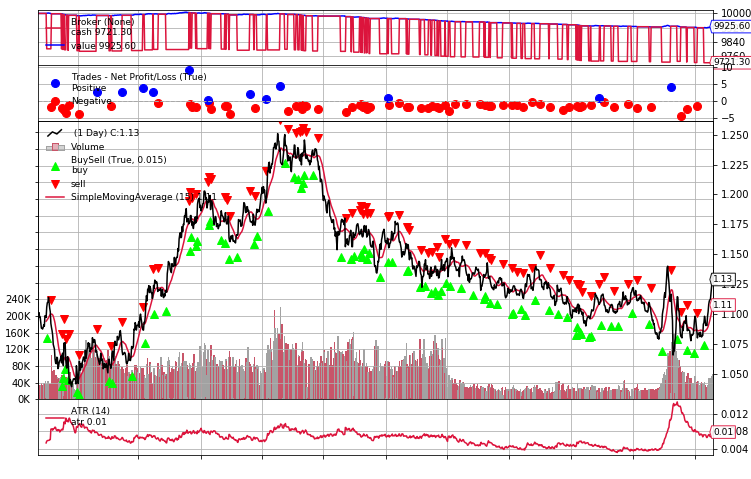

[[<Figure size 432x288 with 5 Axes>]]

In [25]:
# Plotting the graph. Can choose a start and end index as well as different styles
bro.plot(start=0, end=-1, style='candle')